In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
# Loading the data

X, y = fetch_california_housing(return_X_y=True)

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

cal_data = download_read_data(data_path)
#cal_data.head()

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()
correlation = train_data.corr()
correlation['median_house_value']



The size of training data is: 18576 
The size of testing data is: 2064


/tmp/ipykernel_6744/725879837.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

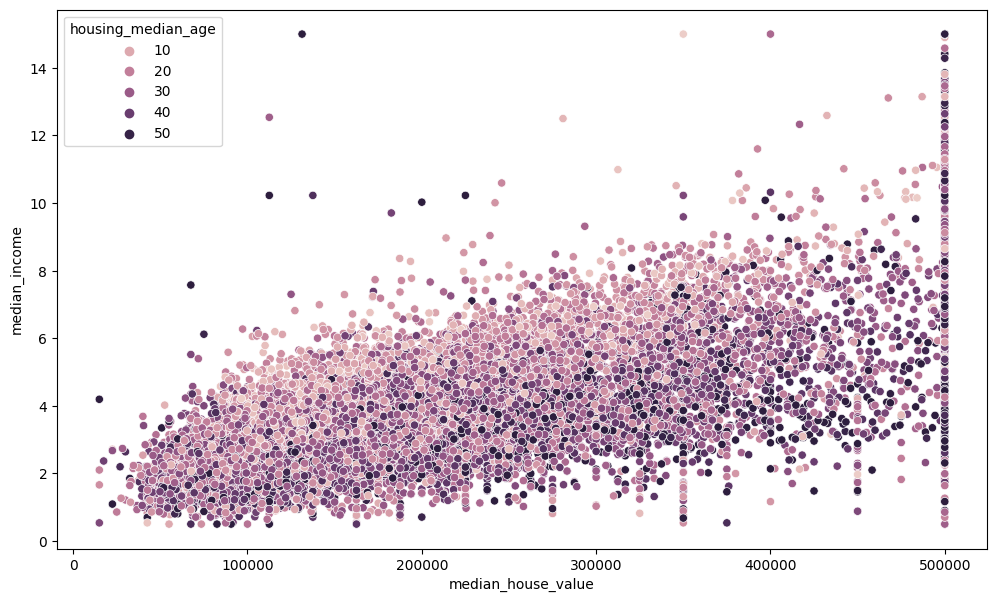

In [2]:
#the relationship between median income and the price of the house.
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

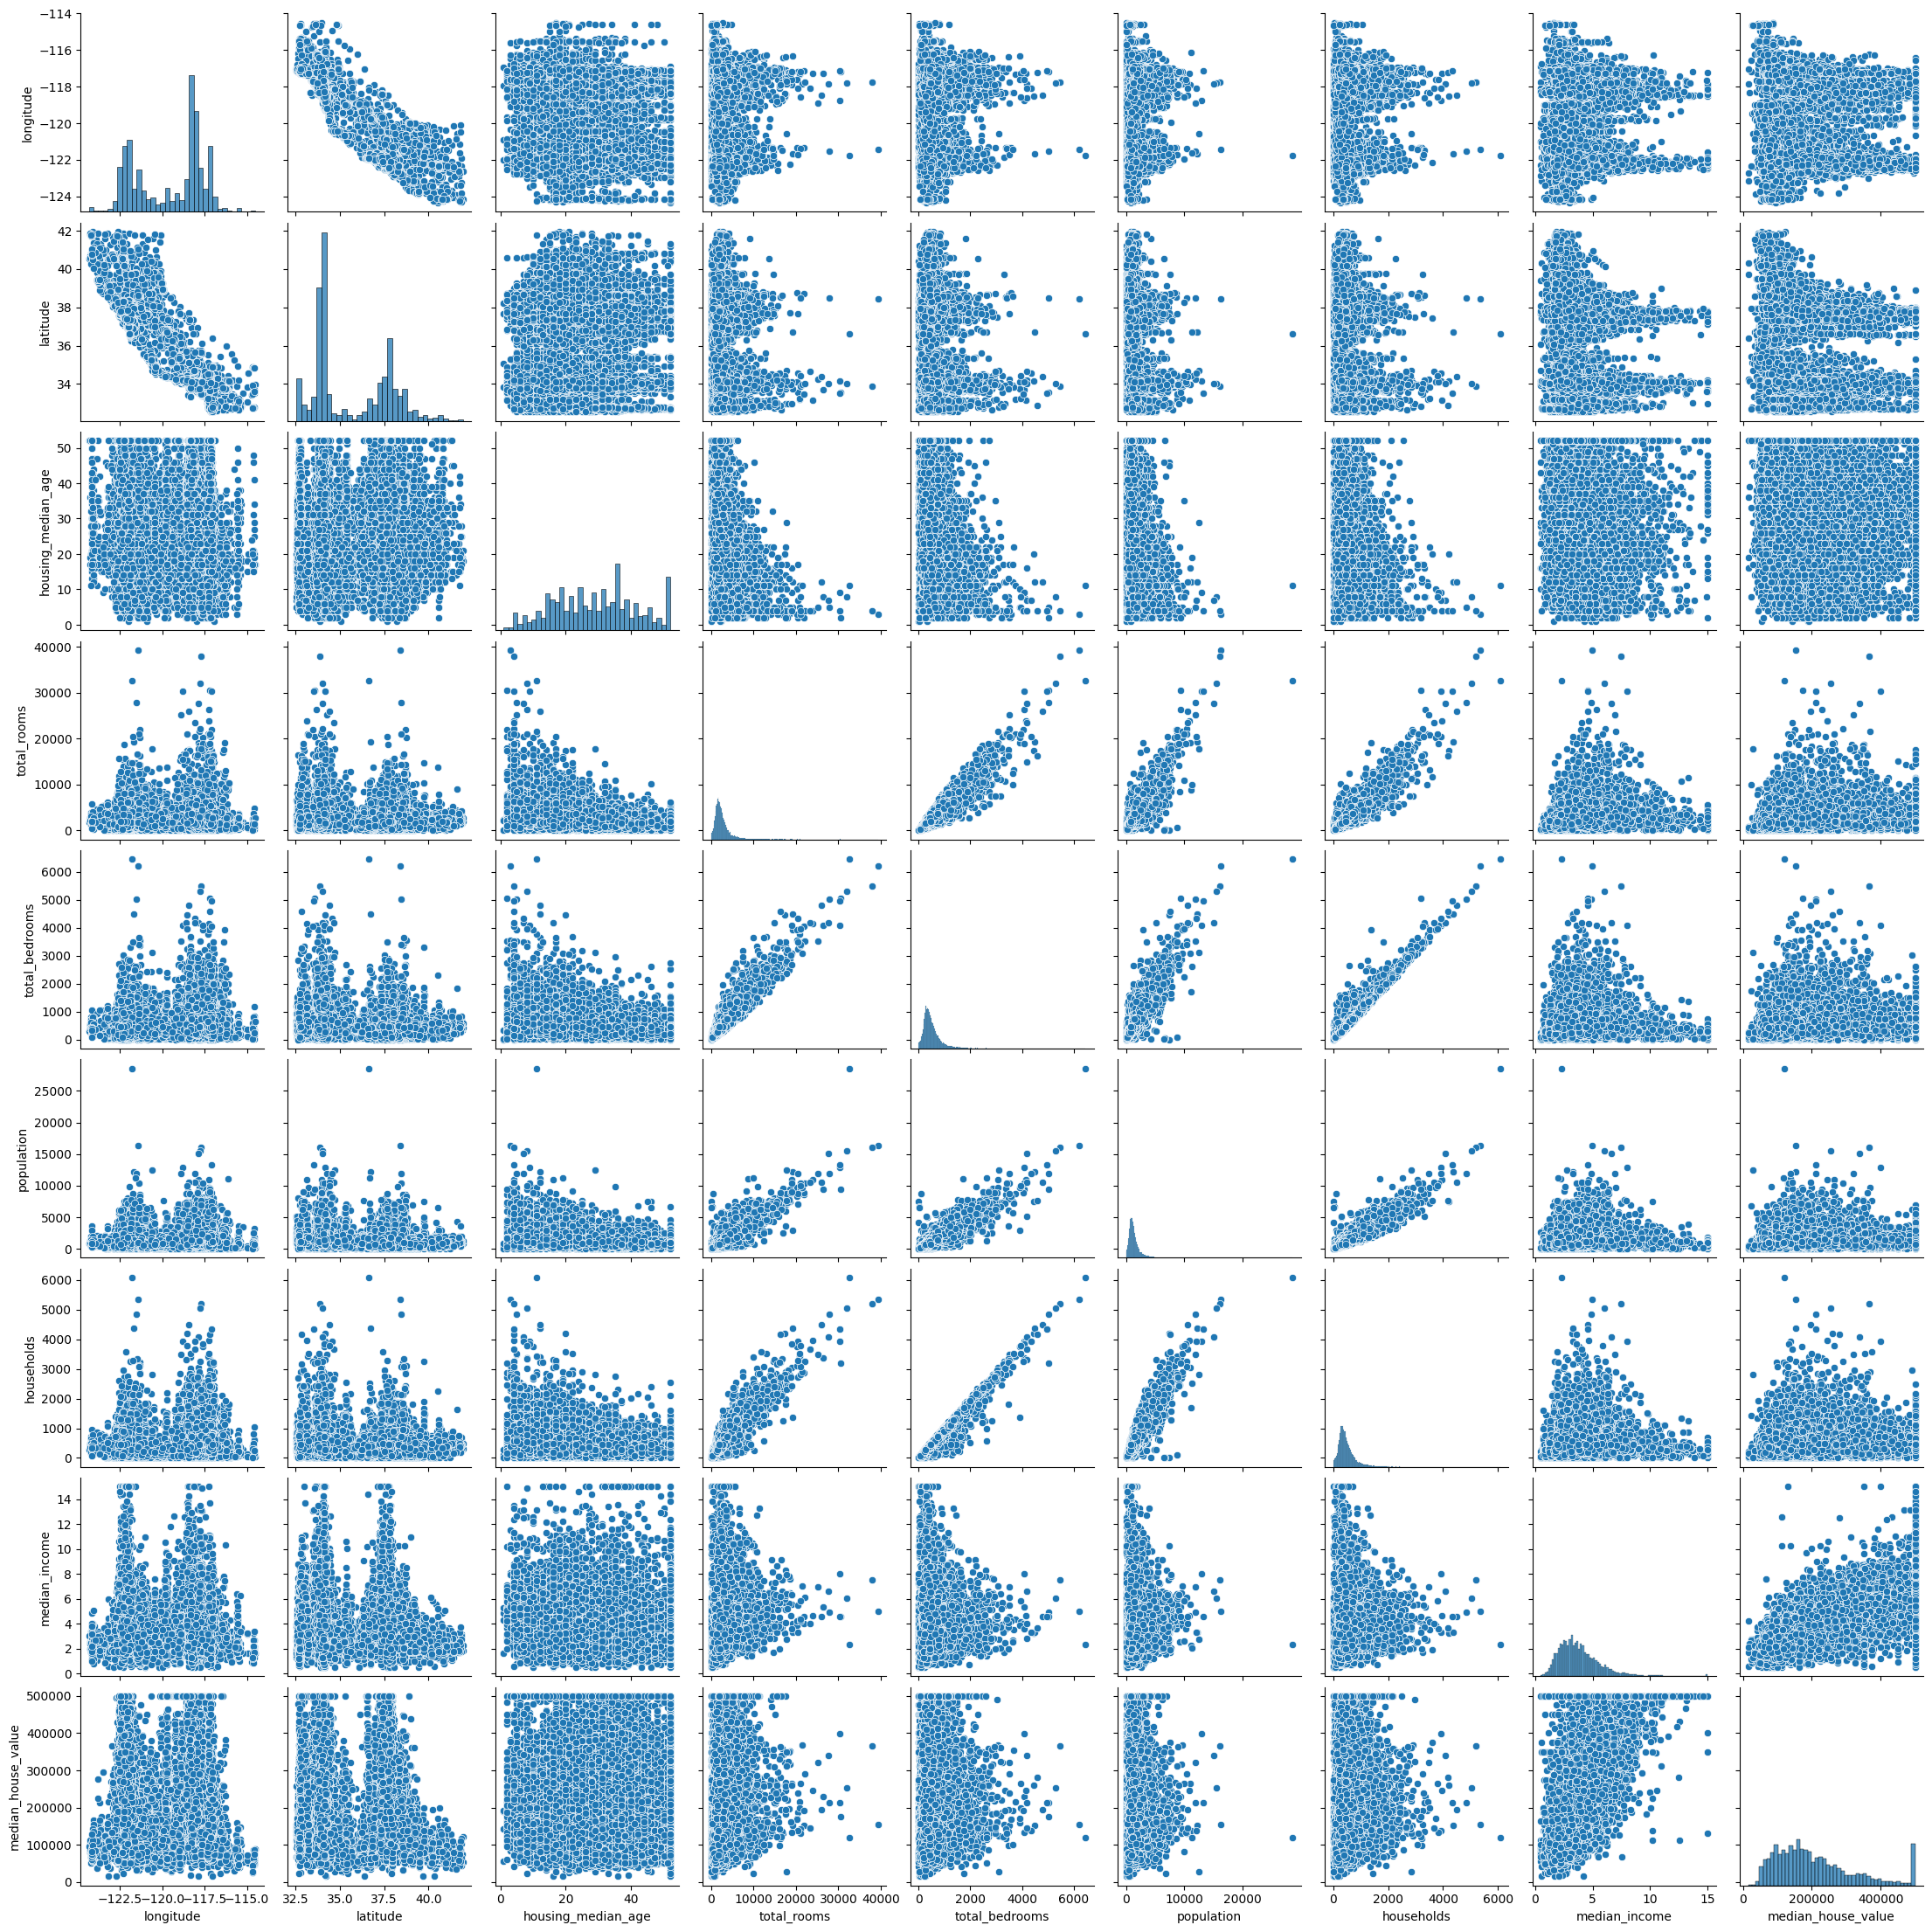

In [3]:
#There are times you want to quickly see different plots to draw insights from the data. In that case, you can use grid plots. Seaborn, a visualization library provides a handy function for that.
sns.pairplot(train_data)

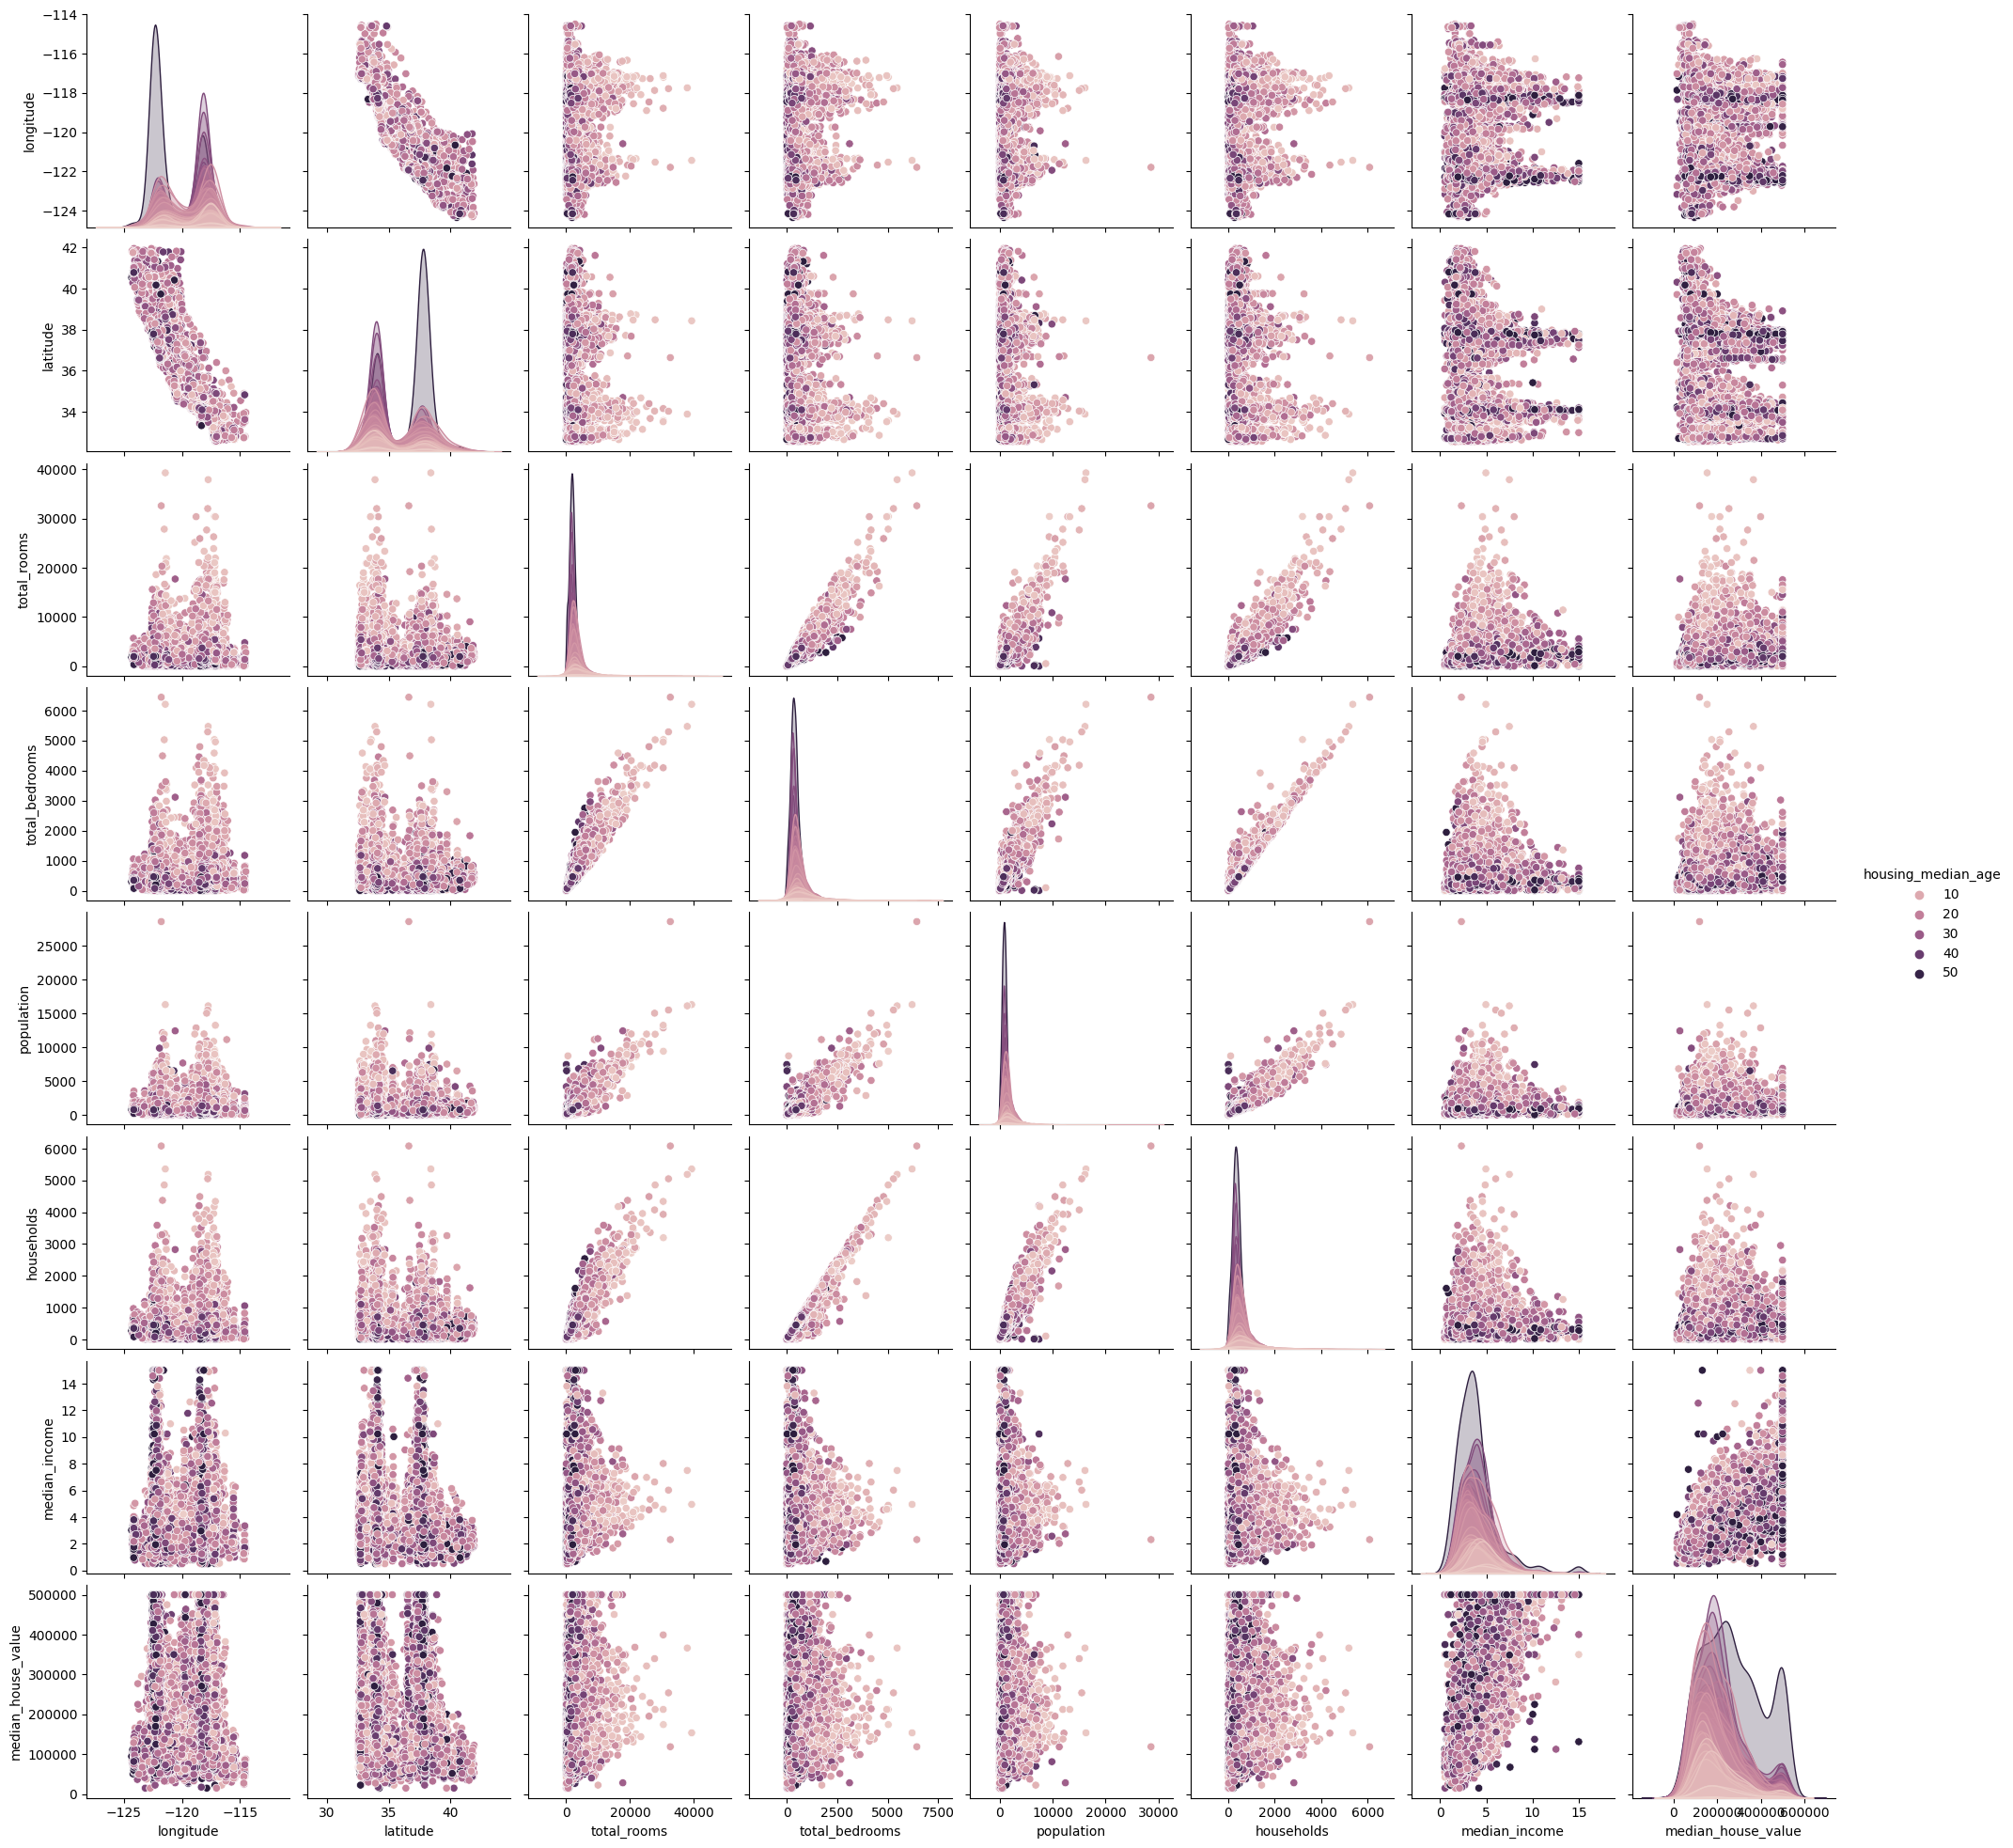

In [4]:
#As you can see, it plots the relationship between all numerical features and histograms of each feature as well. But it's slow...
sns.pairplot(train_data, hue='housing_median_age')